#### Data Import

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [135]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [138]:
def change_input(value):
    if value== '?':
        return 0
    else:
        return int(float(value))
df.sqft_basement=df.sqft_basement.map(lambda x:change_input(x))
df.sqft_basement.value_counts(normalize=True)

0       0.614900
600     0.010048
500     0.009677
700     0.009631
800     0.009307
          ...   
1816    0.000046
1880    0.000046
1960    0.000046
2120    0.000046
1135    0.000046
Name: sqft_basement, Length: 303, dtype: float64

#### EDA

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [142]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

 #### Here we have null values for waterfront, view and yr_renovated columns. Replace null values with zero. We are confident that replacing them with zeroes is a valid strategy based on the assumption that it was not relevant to the concerned property. For example its not possible for each prperty having water front.

In [143]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [144]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

#### Now we can see that counts are same for every column representing no null values presented in data set. We can also find some outliers as max no bedrooms as 33

#### Check the extent of extreme outliers that go beyond the general population of data, and remove them

(array([1.9053e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <a list of 10 Patch objects>)

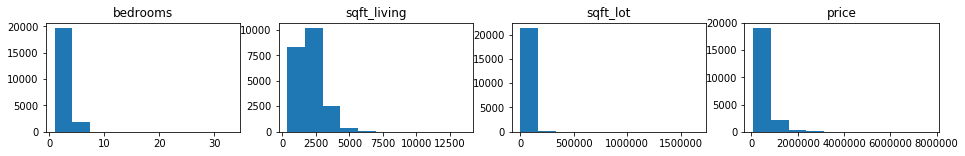

In [8]:
fig = plt.figure(figsize=(16,2))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.set_title('bedrooms')
ax2.set_title('sqft_living')
ax3.set_title('sqft_lot')
ax4.set_title('price')
ax1.hist(df.bedrooms)
ax2.hist(df.sqft_living)
ax3.hist(df.sqft_lot)
ax4.hist(df.price)

#### Count number of extreme values to remove to make sure that we're not removing too many samples

In [9]:

ext1 = len(df.loc[df['bedrooms'] > 11])
ext2 = len(df.loc[df['sqft_living'] > 10000])
ext3 = len(df.loc[df['sqft_lot'] > 400000])
ext4 = len(df.loc[df['price'] > 4000000])
print(ext1, ext2, ext3, ext4)

1 3 43 11


#### From the above charts, it can be seen that there are very few houses which have some features or price appears far from others like 33 bedrooms or price around 700000. However, determining their possible negative effect will be time consuming and in the real data sets there will always be some outliers like some luxury house prices in this dataset. That's why I am not planning to remove outliers.

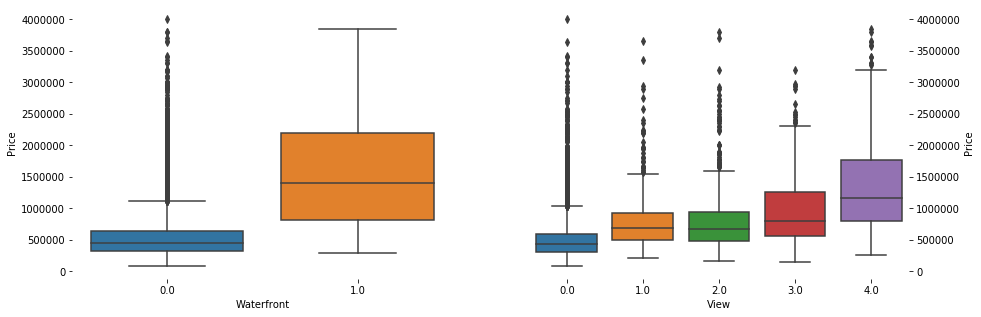

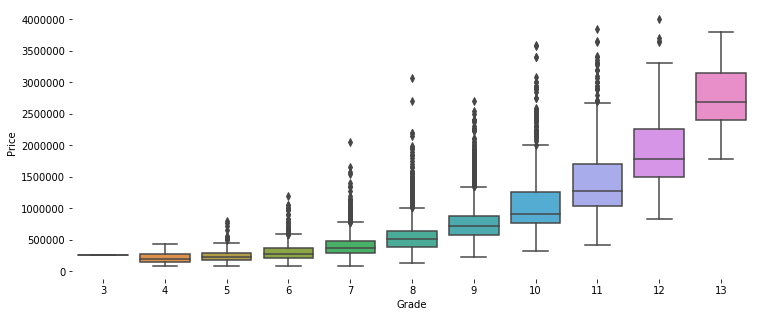

In [15]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

In [70]:
df = df[(df != '?').all(axis=1)]

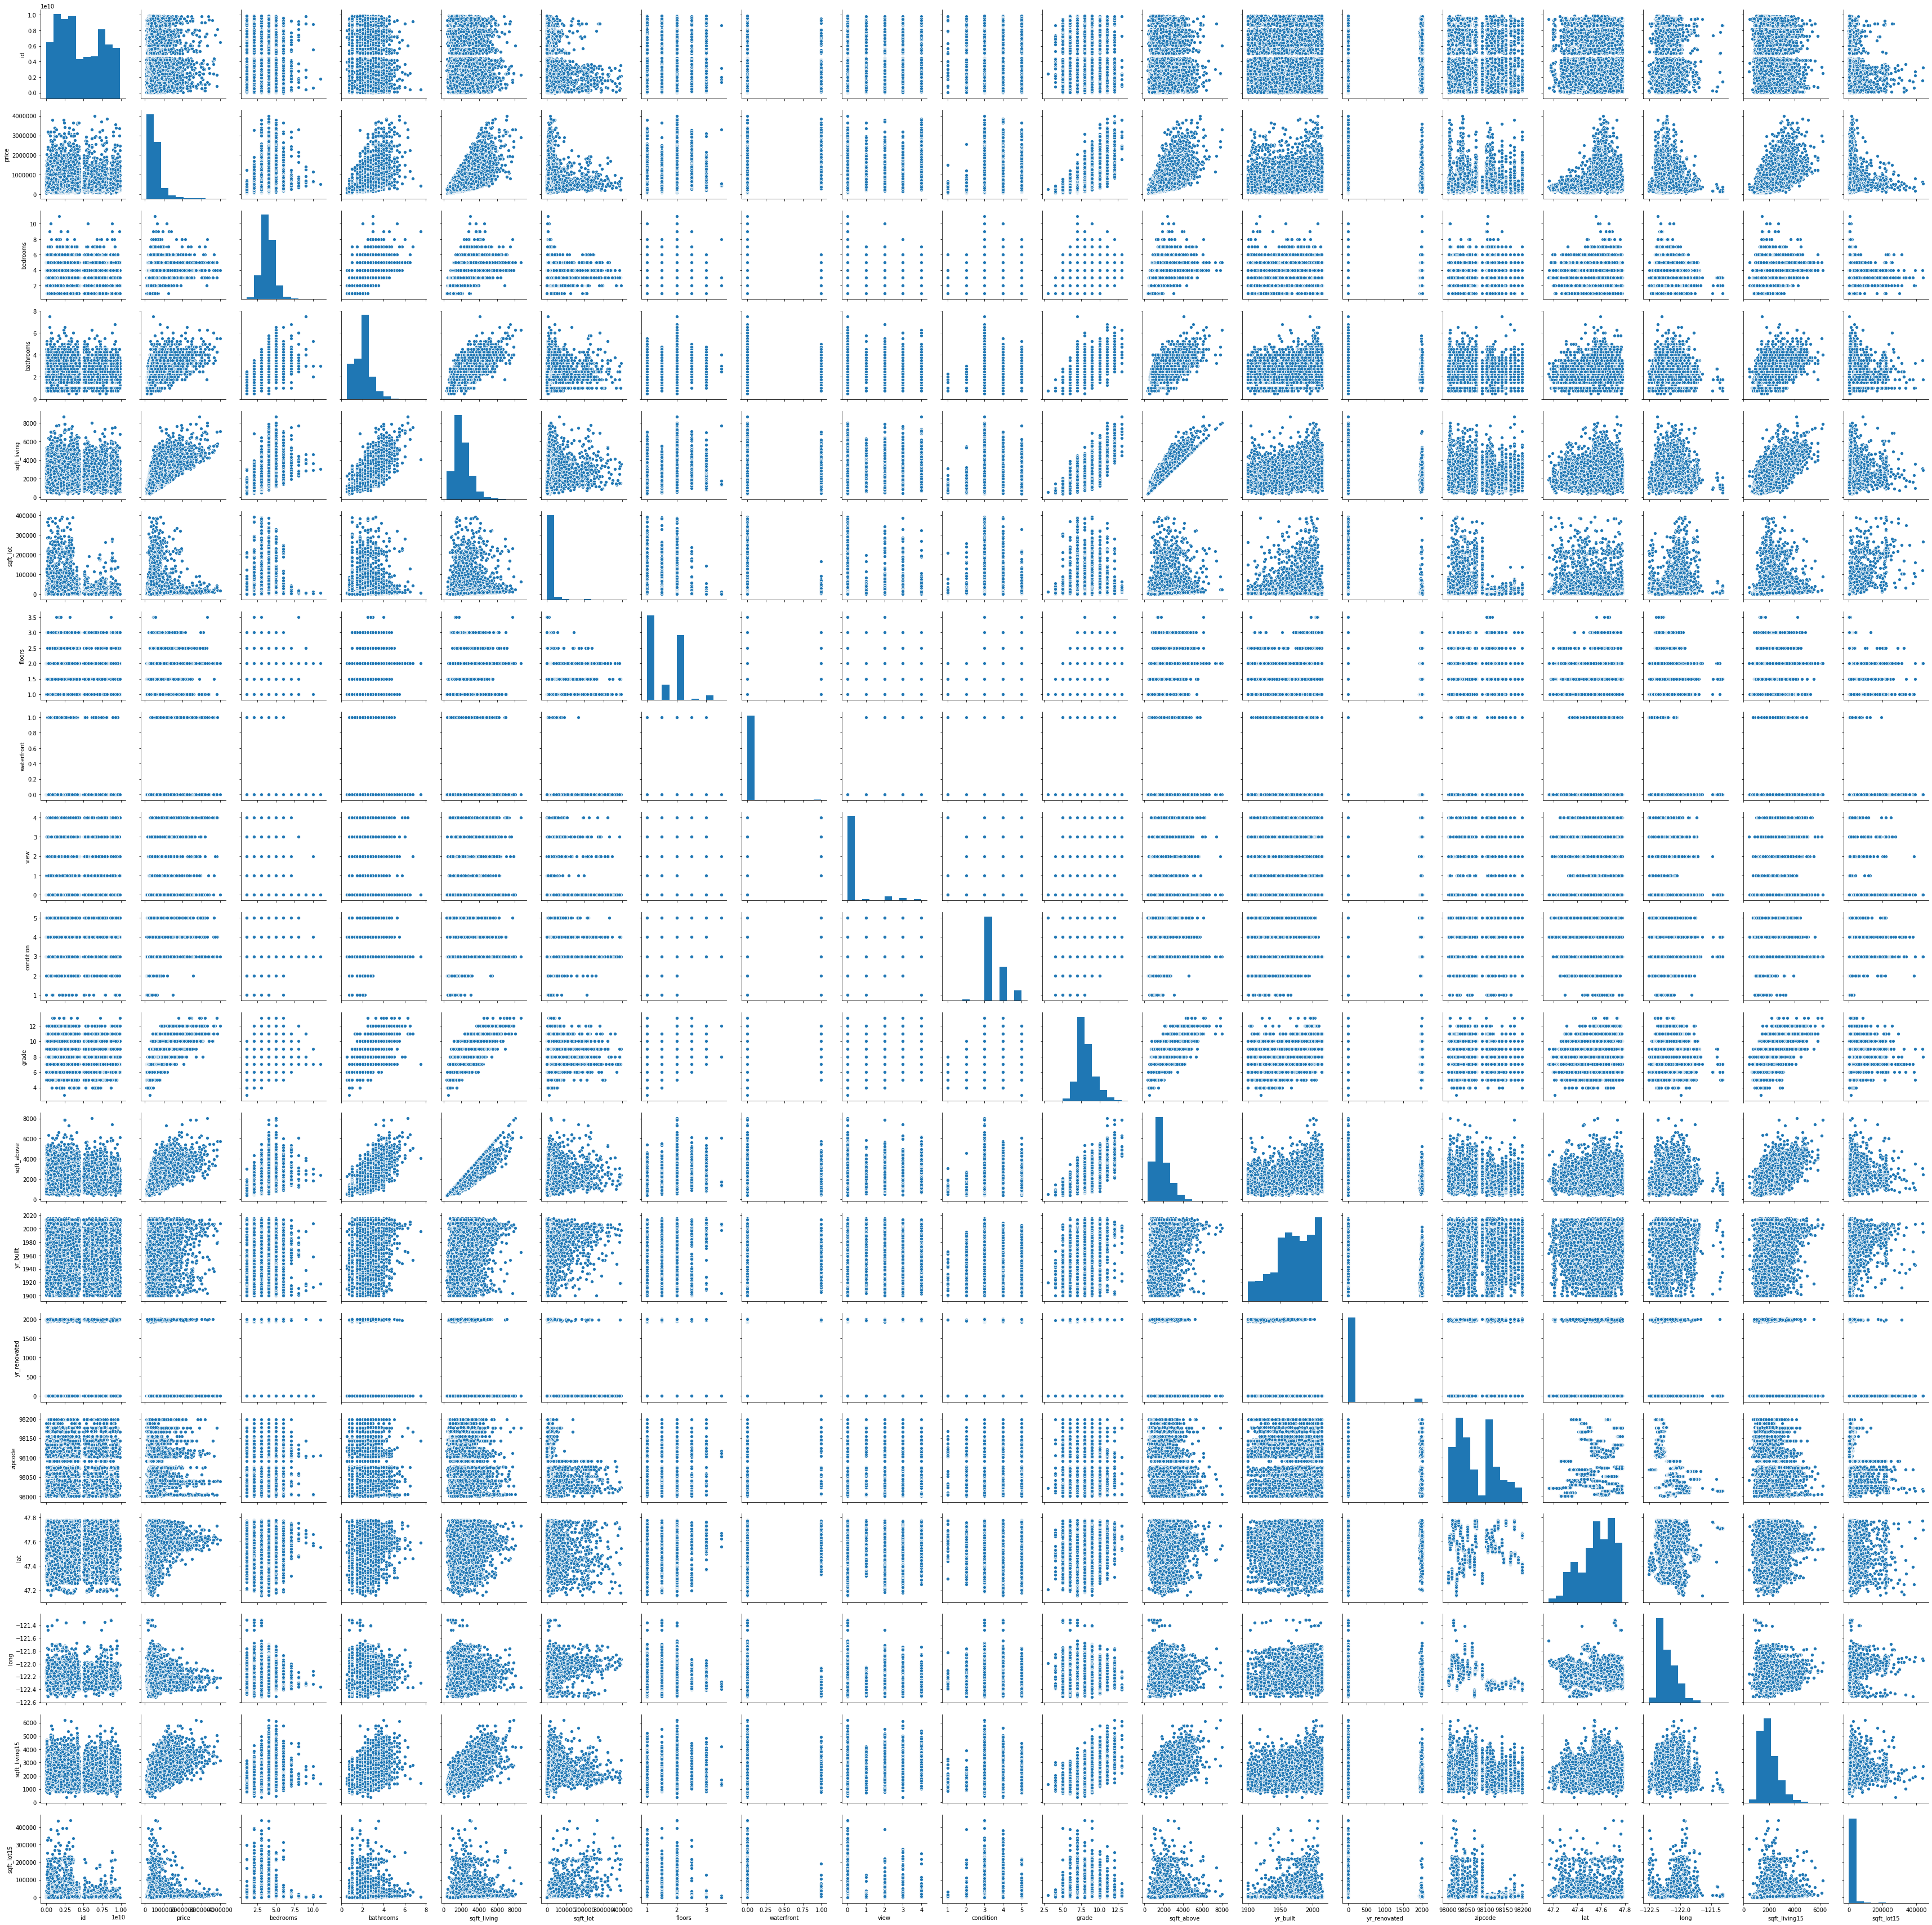

In [11]:
sns.pairplot(df)

#### Important conclusions from the summary table and matrix above:
1. sqft_living has a good correlation with price and appears to have a fairly normal distribution, albeit slightly skewed. This could be a prime candidate for the linear regression model.
2. sqft_lot appears to be spread into 2 groups instead of a clear correlation with price, and does not correlate with sqft_living after a given lot size.
3. grade also appears to have fairly good correlation with price. This is another good candidate for the model.

In [12]:
# creating dataset for colums of interest (having correlation with price)
df1 = df[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
          'condition', 'grade', 'yr_built', 'price']]

df1.describe()

bedrooms     bathrooms   sqft_living       sqft_lot        floors  \
count  21541.000000  21541.000000  21541.000000   21541.000000  21541.000000   
mean       3.371013      2.112738   2074.916067   13876.318184      1.493524   
std        0.902922      0.762377    900.651922   29040.002861      0.539668   
min        1.000000      0.500000    370.000000     520.000000      1.000000   
25%        3.000000      1.750000   1420.000000    5040.000000      1.000000   
50%        3.000000      2.250000   1910.000000    7603.000000      1.500000   
75%        4.000000      2.500000   2550.000000   10625.000000      2.000000   
max       11.000000      7.500000   8670.000000  392475.000000      3.500000   

          condition         grade      yr_built         price  
count  21541.000000  21541.000000  21541.000000  2.154100e+04  
mean       3.409684      7.654055   1970.979342  5.372024e+05  
std        0.650246      1.167018     29.373013  3.483440e+05  
min        1.000000      3.000000   1900.000000  7.800000e+04  
25%        3.000000      7.000000   1951.000000  3.210000e+05  
50%        3.000000      7.000000   1975.000000  4.500000e+05  
75%        4.000000      8.000000   1997.000000  6.428600e+05  
max        5.000000     13.000000   2015.000000  4.000000e+06

#### As we know a common metric used as price per square feet, is affected by house's location in city. We can make a new columns as price per square feet to draw some more insights from data set

In [13]:
df['price_per_sqft_lot'] = df['price']/df['sqft_lot']
df['price_per_sqft_living'] = df['price']/df['sqft_living']

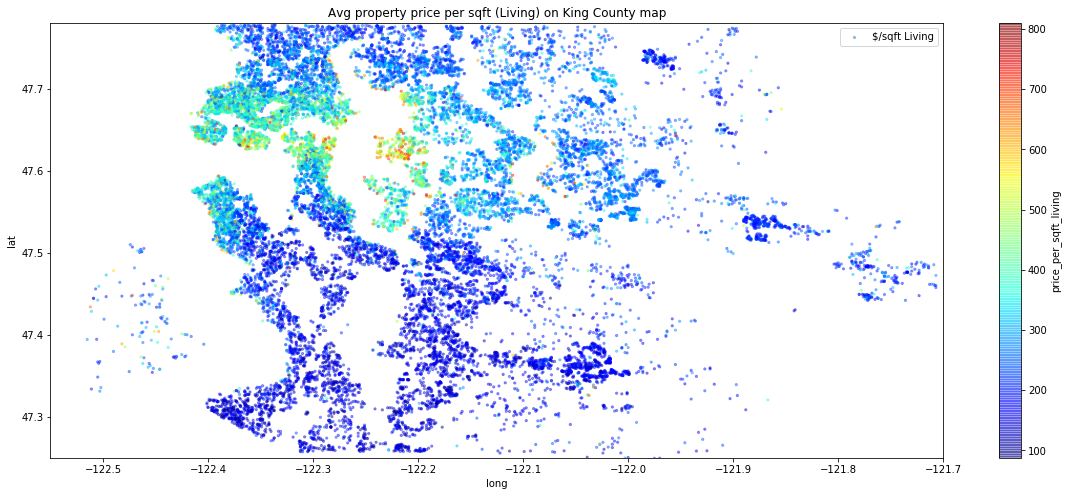

In [14]:
# identify price pattern across city
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
ax.set_title('Avg property price per sqft (Living) on King County map')
ax.set_ylim(47.25,47.78)
ax.set_xlim(-122.55,-121.70)
df.plot(kind="scatter", x="long", y="lat", label="$/sqft Living",
          c="price_per_sqft_living", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, marker='.', ax=ax)

#### Here we can say dots with light green, yellow and red shades are presenting expensive areas and they have water fronts.
 1. There is a distinct difference in price per square feet (living) between different location in the county. The expensive areas tend be in inner city areas, most likely explained by the proximity to jobs, education and public infrastructure whose data is not available in our dataset
 2. We can divide county in two parts as city(expensive) and suburbs(cheaper)by manually identifying the 70 zipcodes into 2 subsets based on the heat map.


In [18]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

#### Seattle is most expensive area in king county housin dataset.

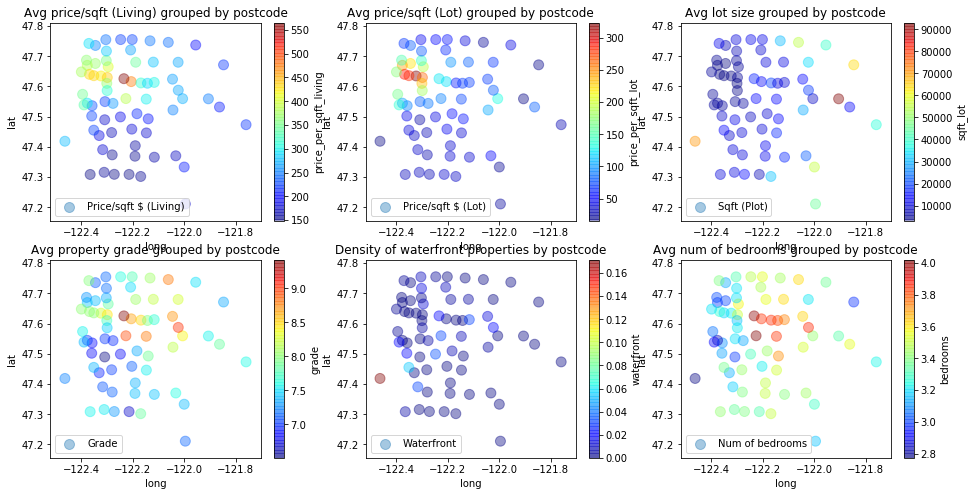

In [20]:
# Identify possible city vs suburb divide by looking at price/sqft and lot area split by zipcode

geo = df.groupby('zipcode').mean()

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
ax1.set_title('Avg price/sqft (Living) grouped by postcode')
ax2.set_title('Avg price/sqft (Lot) grouped by postcode')
ax3.set_title('Avg lot size grouped by postcode')
ax4.set_title('Avg property grade grouped by postcode')
ax5.set_title('Density of waterfront properties by postcode')
ax6.set_title('Avg num of bedrooms grouped by postcode')

geo.plot(kind="scatter", x="long", y="lat", label="Price/sqft $ (Living)",
          c="price_per_sqft_living", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, s=100, ax=ax1)

geo.plot(kind="scatter", x="long", y="lat", label="Price/sqft $ (Lot)",
          c="price_per_sqft_lot", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, s=100, ax=ax2)

geo.plot(kind="scatter", x="long", y="lat", label="Sqft (Plot)",
          c="sqft_lot", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, s=100, ax=ax3)

geo.plot(kind="scatter", x="long", y="lat", label="Grade",
          c="grade", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, s=100, ax=ax4)

geo.plot(kind="scatter", x="long", y="lat", label="Waterfront",
          c="waterfront", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, s=100, ax=ax5)

geo.plot(kind="scatter", x="long", y="lat", label="Num of bedrooms",
          c="bedrooms", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, s=100, ax=ax6)

#### Focusing primarily on the price per square feet (living), supported by other information available from 5 other plots above, we made an assumptions on which postcodes should be classify as "city" and which ones as "suburb".
Note that for the purpose of this model, "city" refers to zip codes with price of over around $300/sq ft as premium areas, instead of a city defined by official municipality borders. We will assign 2 for city and 1 for suburb (instead of the opposite) so that the coefficient of the regression model will be positive.

In [21]:
# Select only zipcodes with a price per sq ft over a threshold value of $300/sqft

city_zipcodes_list = list(geo.loc[geo['price_per_sqft_living']>300].index)

city_zipcodes_dict = {}
for i in range(len(city_zipcodes_list)):
     city_zipcodes_dict[city_zipcodes_list[i]] = 2
        
d = {'zipcode': list(city_zipcodes_dict.keys()),'iscity': list(city_zipcodes_dict.values())}
city_zipcodes = pd.DataFrame(data=d)
city_zipcodes = city_zipcodes.set_index('zipcode')

In [22]:
# Add new field to mark city zipcode or suburb zipcode

df2 = df.join(city_zipcodes, how = 'left', on = 'zipcode')

# Replace iscity == NaN with 1 for Suburbs

df2['iscity'] = df2['iscity'].fillna(1)

# Proportion of city properties

print('{}% of properties are categorized as City'
       .format(round(len(df2.loc[df2['iscity']== 2]) / df2.shape[0] * 100,1)))

27.7% of properties are categorized as City


#### The distinction between city and suburb can be verified by looking at spread of price per square feet (including mean and quartile values)

(0, 1000)

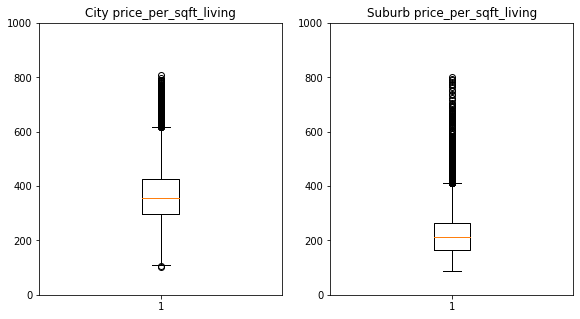

In [24]:
# Define city vs suburb subsets

city_df = df2.loc[df2['iscity']==2]
suburb_df = df2.loc[df2['iscity']==1]

# Investigating the spread of price between city and suburb

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)


ax1.boxplot(city_df.price_per_sqft_living)
ax1.set_title('City price_per_sqft_living')
ax1.set_ylim(0,1000)

ax2.boxplot(suburb_df.price_per_sqft_living)
ax2.set_title('Suburb price_per_sqft_living')
ax2.set_ylim(0,1000)



#### Modelling
As identified earlier, we noted that sqft_living would the primary candidate that drives the price. We can now run our first linear regression model using this as our initial single variable.

In [29]:
# City locations only

cityliving = pd.DataFrame(city_df.sqft_living)
cityprice = pd.DataFrame(city_df.price)

model_skl = LinearRegression(fit_intercept=True)
model_skl.fit(cityliving,cityprice)

r2_city = model_skl.score(cityliving,cityprice)
c1 = model_skl.intercept_
m1 = model_skl.coef_

print ('R square value for City: r2 = {}'.format(r2_city.round(3)))

# Suburb locations only

suburbliving = pd.DataFrame(suburb_df.sqft_living)
suburbprice = pd.DataFrame(suburb_df.price)

model_skl = LinearRegression(fit_intercept=True)
model_skl.fit(suburbliving,suburbprice)

r2_suburb = model_skl.score(suburbliving,suburbprice)
c2 = model_skl.intercept_
m2 = model_skl.coef_

print ('R square value for suburb: r2 = {}'.format(r2_suburb.round(3)))

# All locations

living = pd.DataFrame(df2.sqft_living)
price = pd.DataFrame(df2.price)

model_skl = LinearRegression(fit_intercept=True)
model_skl.fit(living,price)

r2_all =model_skl.score(living,price)
c0 = model_skl.intercept_
m0 = model_skl.coef_

print ('R square value for all properties: r2 = {}'.format(r2_all.round(3)))

R square value for City: r2 = 0.664
R square value for suburb: r2 = 0.556
R square value for all properties: r2 = 0.482


#### Below is the graphical representation of the regression above and the spread of property prices categorized by city and suburb.

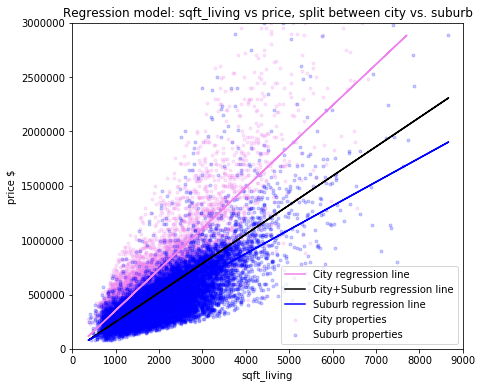

In [32]:
# Define regression lines for sqft_living model

def reg_line (m, c, xs):
    return [(m*x)+c for x in xs]

reg_line0 = reg_line(float(m0), float(c0), df2.sqft_living.tolist())
reg_line1 = reg_line(float(m1), float(c1), city_df.sqft_living.tolist())
reg_line2 = reg_line(float(m2), float(c2), suburb_df.sqft_living.tolist())

fig = plt.figure(figsize=(7,6))
ax  = plt.subplot()
ax.set_xlim(0,9000)
ax.set_ylim(0,3000000)

# Plot regression lines

plt.plot(city_df.sqft_living, reg_line1, color='violet', label='City regression line')
plt.plot(df2.sqft_living, reg_line0, color='black', label='City+Suburb regression line')
plt.plot(suburb_df.sqft_living, reg_line2, color='blue', label='Suburb regression line')

# Plot scatter, split between city and suburb

plt.scatter(city_df.sqft_living, city_df.price, color='violet', marker='.', alpha=0.2, label='City properties')
plt.scatter(suburb_df.sqft_living, suburb_df.price, color='blue', marker='.', alpha=0.2, label='Suburb properties')

plt.title('Regression model: sqft_living vs price, split between city vs. suburb')
plt.xlabel('sqft_living')
plt.ylabel('price $')
plt.legend()

#### Feature Selection

#### Correlation Among Explanatory Variables

#### If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. This relation can be estimated when we look at the definitions in the dataset but to be sure correlation matrix should be checked. However, this does not mean that you must remove one of the highly correlated features. For example: bathrooms and sqrt_living. They are highly correlated but I do not think that the relation among them is the same as the relation between sqt_living and sqt_above.

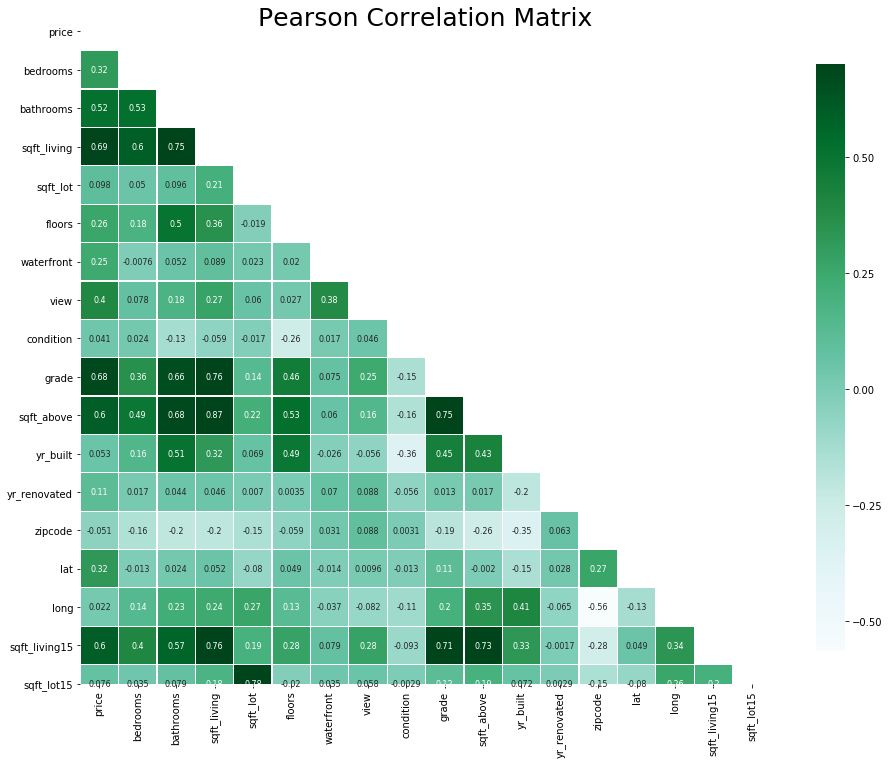

In [19]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [145]:
df_dm=df.copy()
df_dm.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

#### Binning

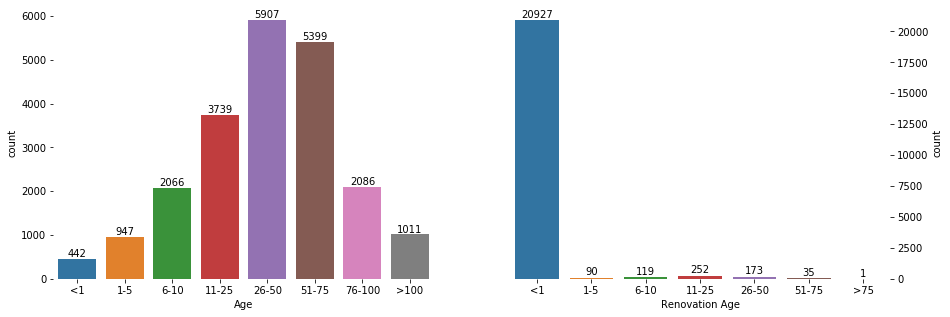

In [146]:
# just take the year from the date column
df_dm['sales_yr']=pd.DatetimeIndex(df['date']).year

# add the age of the buildings when the houses were sold as a new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

In [154]:
df_dm.shape

(21597, 39)

In [155]:
df_dm=df_dm[df_dm!='?']
df_dm.shape

(21597, 39)

In [156]:
df_dm.isnull().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated            0
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
sales_yr                0
age                     0
age_rnv                 0
age_binned_<1           0
age_binned_1-5          0
age_binned_6-10         0
age_binned_11-25        0
age_binned_26-50        0
age_binned_51-75        0
age_binned_76-100       0
age_binned_>100         0
age_rnv_binned_<1       0
age_rnv_binned_1-5      0
age_rnv_binned_6-10     0
age_rnv_binned_11-25    0
age_rnv_binned_26-50    0
age_rnv_binned_51-75    0
age_rnv_binn

#### In simple linear regression and found a poor fit. In order to improve this model we can add more features. When we have more than one feature in a linear regression, it is defined as multiple regression. 

#### Multiple Regression  Model

In [157]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [158]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [168]:
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

In [61]:


features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
# artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
# artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,rtecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -50849424.379259475
Coefficients: [-5.99869461e+04  9.89366225e+03  3.06569047e+02 -6.50813219e-01
  1.43013555e+03  5.19373457e+02]


Model            Details  Root Mean Squared Error (RMSE)  \
0  Multiple Regression-1  selected features                      247056.749   

   R-squared (training)  R-squared (test)  5-Fold Cross Validation  
0                 0.504             0.514                    0.503

In [64]:

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 18865065.946453907
Coefficients: [-3.60493317e+04  4.34319640e+04  1.52661881e+02 -4.23711955e-01
  1.36179675e+04  4.94843741e+05  5.11868772e+04  1.29662547e+05
 -7.50125678e+04 -1.00251766e+05 -1.02266992e+05 -1.33943459e+05
 -5.34910746e+04  8.05507079e+04  1.79347921e+05  2.05067230e+05
 -2.00150374e+02]


Model            Details  Root Mean Squared Error (RMSE)  \
0  Multiple Regression-2  selected features                      206414.738   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.655                          0.655             0.661   

   Adjusted R-squared (test)  5-Fold Cross Validation  
0                       0.66                    0.652

In [122]:
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_4 = linear_model.LinearRegression()
complex_model_4.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_4.intercept_))
print('Coefficients: {}'.format(complex_model_4.coef_))

pred = complex_model_4.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_4.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_4.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_4.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_4.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_4,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 7204697.137245299
Coefficients: [-3.04264414e+04  3.42416213e+04  9.57909388e+01  9.68486279e-02
 -3.91006184e+03  5.88718821e+05  5.42682823e+04  3.48758457e+04
  9.68246897e+04  5.80301003e+01  3.77610100e+01 -4.05248648e+04
 -5.60492948e+04 -6.25280397e+04 -8.71021590e+04 -5.95510360e+04
  3.43782707e+04  1.24855681e+05  1.46521442e+05 -1.51074618e+04
  1.25773921e+05  8.92231329e+04  6.94129028e+04 -5.66783123e+04
 -1.26542435e+05 -8.60817475e+04 -6.06892140e+02  5.90944822e+05
 -1.92684288e+05  3.78209129e+01 -2.42773155e-01]


Model                   Details  \
1  Multiple Regression-4              all features   
2       Ridge Regression     alpha=1, all features   
5       Lasso Regression     alpha=1, all features   
6       Lasso Regression   alpha=100, all features   
8  Multiple Regression-4              all features   
7       Lasso Regression  alpha=1000, all features   
3       Ridge Regression   alpha=100, all features   
4       Ridge Regression  alpha=1000, all features   
0  Multiple Regression-2         selected features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                      191876.779                 0.713   
2                      191855.131                 0.713   
5                      191875.177                 0.713   
6                      191776.704                 0.712   
8                      191876.779                 0.713   
7                      192705.861                 0.708   
3                      193956.462                 0.704   
4                      208636.555                 0.658   
0                      206414.738                 0.655   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.712             0.710                      0.708   
2                          0.712             0.710                      0.708   
5                          0.712             0.710                      0.708   
6                          0.712             0.710                      0.708   
8                          0.712             0.710                      0.708   
7                          0.707             0.708                      0.706   
3                          0.704             0.704                      0.702   
4                          0.658             0.657                      0.655   
0                          0.655             0.661                      0.660   

   5-Fold Cross Validation  
1                    0.708  
2                    0.708  
5                    0.708  
6                    0.708  
8                    0.708  
7                    0.704  
3                    0.700  
4                    0.654  
0                    0.652

#### Regularization

#### When to use ridge vs lasso regression:

1. Many small/medium sized effects: use ridge.
2. Only a few variables with medium/large effect: use lasso.

#### Ridge Regression

In [75]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_R.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_R.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_R.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                   Details  \
1  Multiple Regression-4              all features   
2       Ridge Regression     alpha=1, all features   
3       Ridge Regression   alpha=100, all features   
4       Ridge Regression  alpha=1000, all features   
0  Multiple Regression-2         selected features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                      191876.779                 0.713   
2                      191855.131                 0.713   
3                      193956.462                 0.704   
4                      208636.555                 0.658   
0                      206414.738                 0.655   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.712             0.710                      0.708   
2                          0.712             0.710                      0.708   
3                          0.704             0.704                      0.702   
4                          0.658             0.657                      0.655   
0                          0.655             0.661                      0.660   

   5-Fold Cross Validation  
1                    0.708  
2                    0.708  
3                    0.700  
4                    0.654  
0                    0.652

#### Lasso Regression

In [76]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_L.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                   Details  \
1  Multiple Regression-4              all features   
2       Ridge Regression     alpha=1, all features   
5       Lasso Regression     alpha=1, all features   
6       Lasso Regression   alpha=100, all features   
7       Lasso Regression  alpha=1000, all features   
3       Ridge Regression   alpha=100, all features   
4       Ridge Regression  alpha=1000, all features   
0  Multiple Regression-2         selected features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                      191876.779                 0.713   
2                      191855.131                 0.713   
5                      191875.177                 0.713   
6                      191776.704                 0.712   
7                      192705.861                 0.708   
3                      193956.462                 0.704   
4                      208636.555                 0.658   
0                      206414.738                 0.655   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.712             0.710                      0.708   
2                          0.712             0.710                      0.708   
5                          0.712             0.710                      0.708   
6                          0.712             0.710                      0.708   
7                          0.707             0.708                      0.706   
3                          0.704             0.704                      0.702   
4                          0.658             0.657                      0.655   
0                          0.655             0.661                      0.660   

   5-Fold Cross Validation  
1                    0.708  
2                    0.708  
5                    0.708  
6                    0.708  
7                    0.704  
3                    0.700  
4                    0.654  
0                    0.652

In [150]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

In [151]:
polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

In [163]:
r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)


Model                                        Details  \
0  Polynomial Regression  degree=2, selected features, no preprocessing   
2  Polynomial Regression  degree=2, selected features, no preprocessing   
1  Polynomial Regression  degree=3, selected features, no preprocessing   
3  Polynomial Regression  degree=3, selected features, no preprocessing   

   Root Mean Squared Error (RMSE)  R-squared (training)  R-squared (test)  \
0                      189436.035                 0.711             0.714   
2                      189436.035                 0.711             0.714   
1                      187796.441                 0.732             0.719   
3                      187796.441                 0.732             0.719   

   5-Fold Cross Validation  
0                    0.714  
2                    0.714  
1                    0.380  
3                    0.380


#### Statsmodels - OLS, multiple linear regression

In [179]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','waterfront',
            'view','grade','zipcode']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_dm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     4585.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:05:38   Log-Likelihood:            -2.9755e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21589   BIC:                         5.952e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.742e+07   3.02e+06    -15.724      0.000   -5.33e+07   -4.15e+07
bedrooms     -2.73e+04   2175.180    -12.552      0.000   -3.16e+04    -2.3e+04
bathrooms   -1.911e+04   3286.208     -5.814      0.000   -2.55e+04   -1.27e+04
sqft_living   200.7341      3.431     58.504      0.000     194.009     207.459
waterfront   6.147e+05   2.09e+04     29.348      0.000    5.74e+05    6.56e+05
view         6.284e+04   2359.531     26.634      0.000    5.82e+04    6.75e+04
grade        9.566e+04   2186.724     43.744      0.000    9.14e+04    9.99e+04
zipcode       478.4139     30.729     15.569      0.000     418.184     538.644
==============================================================================
Omnibus:                    15538.236   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           875502.283
Skew:                           2.886   Prob(JB):                         0.00
Kurtosis:                      33.653   Cond. No.                     1.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
#Multiple regression
X= df_dm[['bedrooms','sqft_living', 'grade', 'bathrooms']]
y= df_dm['price']

In [181]:
#use cross validation_train_test_split from sklearn to split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [182]:
#created an instance of linear regression model
regressor1 = LinearRegression()  
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
#To retrieve the intercept:
print(regressor1.intercept_)
#For retrieving the slope:
print(regressor1.coef_)

-482622.30928181973
[-44119.71461333    228.29338147  98914.6596302  -28070.99727106]


In [184]:
cdf=pd.DataFrame(regressor1.coef_,X.columns,columns=['Coeff'])
cdf.head()

Coeff
bedrooms    -44119.714613
sqft_living    228.293381
grade        98914.659630
bathrooms   -28070.997271

Text(0, 0.5, 'predicted values')

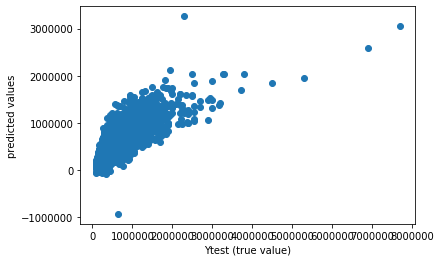

In [186]:
#Predicting Test Data
predictions=regressor1.predict(X_test)
plt.scatter(y_test,predictions1)
plt.xlabel("Ytest (true value)")
plt.ylabel("predicted values")

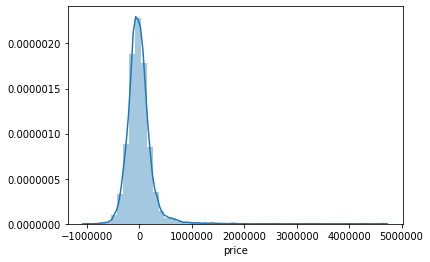

In [187]:
#handling Residual
sns.distplot(y_test-predictions)